# TD2: Image Segmentation Exercises

## Part I: Basics of Image Segmentation and Evaluation Metrics

### Exercise 1: Calculate IoU and Dice Coefficient


**Objective:** Implement a function to calculate Intersection over Union (IoU) and Dice Coefficient.

Intersection over Union (IoU) measures the overlap between predicted segmentation and ground truth.

Formula:
$$IoU = \frac{|A \cap B|}{|A \cup B|}$$

Dice Coefficient is another measure of overlap between predicted and actual segmentation.

Formula:
$$Dice = \frac{2|A \cap B|}{|A| + |B|}$$

**Code Implementation:**

In [1]:

import numpy as np

def iou_score(pred, true):
    intersection = np.logical_and(pred, true)
    union = np.logical_or(pred, true)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def dice_coefficient(pred, true):
    intersection = np.sum(pred * true)
    return (2. * intersection) / (np.sum(pred) + np.sum(true))

# Example input: binary masks for ground truth and prediction
true_mask = np.array([[0, 1, 1], [0, 1, 0], [1, 0, 0]])
pred_mask = np.array([[1, 1, 0], [0, 1, 0], [1, 0, 0]])

print(f"IoU Score: {iou_score(pred_mask, true_mask)}")
print(f"Dice Coefficient: {dice_coefficient(pred_mask, true_mask)}")


IoU Score: 0.6
Dice Coefficient: 0.75


## Part II: Traditional Image Segmentation Techniques

### Exercise 2: Otsu Thresholding


**Objective:** Implement Otsu's method for thresholding to create a binary image.

**Steps:**
1. Load the image and convert it to grayscale.
2. Compute the histogram.
3. Apply Otsu’s method to find the optimal threshold.
4. Create a binary image.

**Code Implementation:**

Mounted at /content/drive


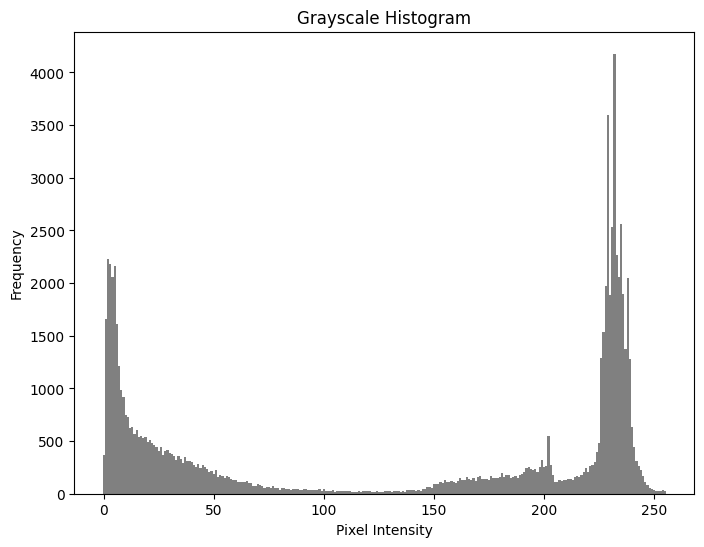

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive", force_remount=True)

# Step 1: Read the image
image = cv2.imread('/content/drive/MyDrive/Computer vision/segmentation/test_img.jpg')  # Replace with the actual path to your image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Compute histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# Plot histogram as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(256), hist.ravel(), color='gray', width=1)  # Using bar chart
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()



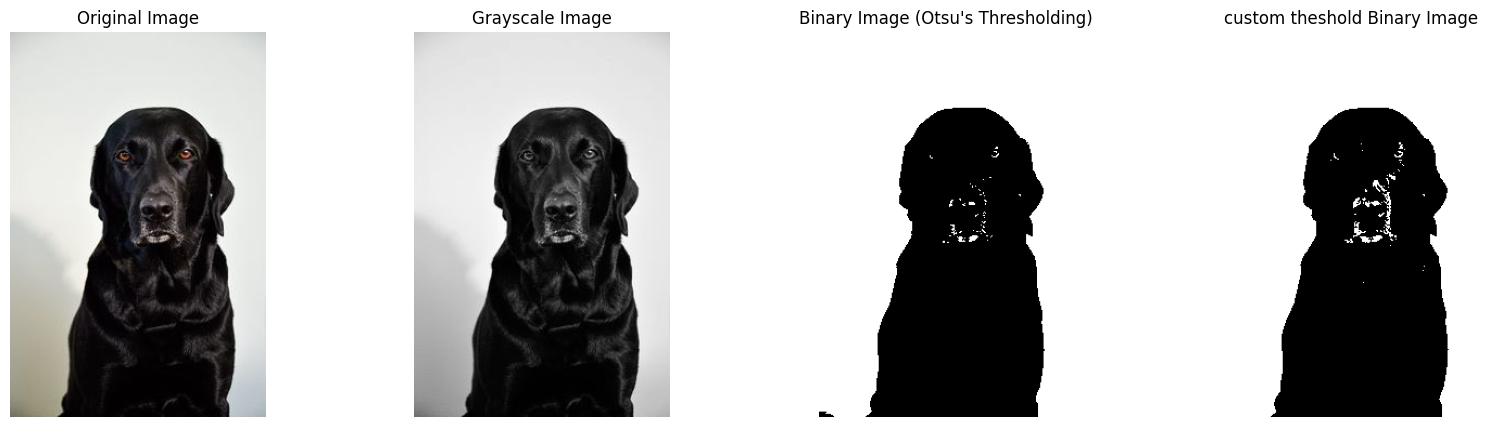

In [7]:


# Step 3: Apply Otsu's thresholding
_, binary_Otsu = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
custom_threshold_value = 100
_, binary_custom = cv2.threshold(gray, custom_threshold_value, 255, cv2.THRESH_BINARY)
# Step 4: Display original image, grayscale image, binary image, and histogram
plt.figure(figsize=(20, 5))

# Display original image
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for proper display
plt.axis("off")

# Display grayscale image
plt.subplot(1, 4, 2)
plt.title("Grayscale Image")
plt.imshow(gray, cmap='gray')
plt.axis("off")

# Display binary image
plt.subplot(1, 4, 3)
plt.title("Binary Image (Otsu's Thresholding)")
plt.imshow(binary_Otsu, cmap='gray')
plt.axis("off")

# Display histogram of grayscale image
plt.subplot(1, 4, 4)
plt.title("custom theshold Binary Image")

plt.imshow(binary_custom, cmap='gray')
plt.axis("off")

plt.show()


### Exercise 3: Sobel Edge Detection


**Objective:** Detect edges using Sobel operator.

**Steps:**
1. Convert the image to grayscale.
2. Apply Sobel operator to compute horizontal and vertical gradients.
3. Calculate the magnitude of the gradient.

**Code Implementation:**

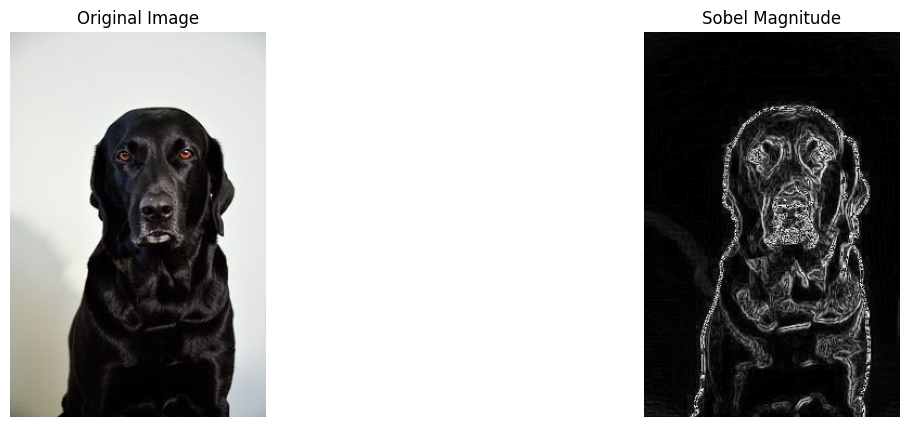

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import cv2

# Load the image (replace with the actual path)
image = cv2.imread('/content/drive/MyDrive/Computer vision/segmentation/test_img.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Define Sobel kernels for horizontal and vertical edges
sobel_x_kernel = np.array([             [-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])

sobel_y_kernel = np.array([             [-1, -2, -1],
                           [0, 0, 0],
                           [1, 2, 1]])

# Step 2: Convolve the image with Sobel kernels to compute the gradients
sobelx = ndimage.convolve(gray.astype(float), sobel_x_kernel)  # Horizontal gradient
sobely = ndimage.convolve(gray.astype(float), sobel_y_kernel)  # Vertical gradient

# Step 3: Compute the magnitude of the gradient
sobel_magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)
sobel_magnitude = np.uint8(sobel_magnitude)  # Convert to uint8 for display

# Display the result
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis("off")  # Hide axis for better visualization

# Display Sobel magnitude
plt.subplot(1, 2, 2)
plt.title("Sobel Magnitude")
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis("off")  # Hide axis for better visualization

plt.show()


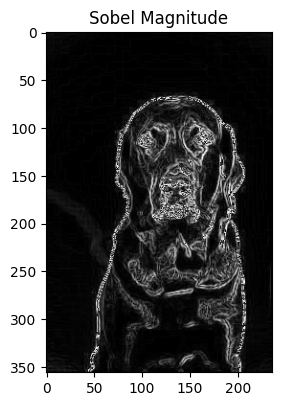

In [10]:

# Step 1: Read the image and convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Sobel operator
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal gradient
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  # Vertical gradient

# Step 3: Compute the magnitude of the gradient
sobel_magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)
sobel_magnitude = np.uint8(sobel_magnitude)

# Display the results
plt.subplot(1, 2, 1)
plt.title("Sobel Magnitude")
plt.imshow(sobel_magnitude, cmap='gray')
plt.show()


### Exercise 4: Canny Edge Detection


**Objective:** Use Canny edge detection to identify edges in an image.

**Steps:**
1. Convert the image to grayscale.
2. Apply Gaussian blur to reduce noise.
3. Use Canny function to detect edges.

**Code Implementation:**

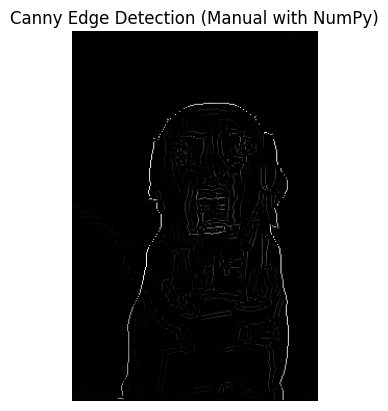

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
import cv2

# Load the image (replace with your actual path)
image = cv2.imread('/content/drive/MyDrive/Computer vision/segmentation/test_img.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 1: Apply Gaussian Blur manually using a Gaussian kernel
def gaussian_kernel(size, sigma):
    """Generate a Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(- ((x - (size - 1) / 2)**2 + (y - (size - 1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # Normalize to sum to 1

size = 5
sigma = 1.4
kernel = gaussian_kernel(size, sigma)
blurred = convolve(gray.astype(float), kernel)

# Step 2: Compute the gradient using Sobel filters
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

gradient_x = convolve(blurred, sobel_x)
gradient_y = convolve(blurred, sobel_y)

# Step 3: Compute the gradient magnitude and direction
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
direction = np.arctan2(gradient_y, gradient_x)

# Step 4: Non-Maximum Suppression (NMS) - Thinning edges
def non_maximum_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    output = np.zeros_like(magnitude)
    angle = direction * 180. / np.pi  # Convert radians to degrees
    angle[angle < 0] += 180

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Get the angle in degrees
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] < 180):
                q = magnitude[i, j + 1]
                r = magnitude[i, j - 1]
            elif (22.5 <= angle[i, j] < 67.5):
                q = magnitude[i + 1, j - 1]
                r = magnitude[i - 1, j + 1]
            elif (67.5 <= angle[i, j] < 112.5):
                q = magnitude[i + 1, j]
                r = magnitude[i - 1, j]
            elif (112.5 <= angle[i, j] < 157.5):
                q = magnitude[i - 1, j - 1]
                r = magnitude[i + 1, j + 1]

            if (magnitude[i, j] >= q) and (magnitude[i, j] >= r):
                output[i, j] = magnitude[i, j]
            else:
                output[i, j] = 0

    return output

edges = non_maximum_suppression(magnitude, direction)

# Step 5: Display the result
plt.title("Canny Edge Detection (Manual with NumPy)")
plt.imshow(edges, cmap='gray')
plt.axis('off')  # Hide axis for better visualization
plt.show()


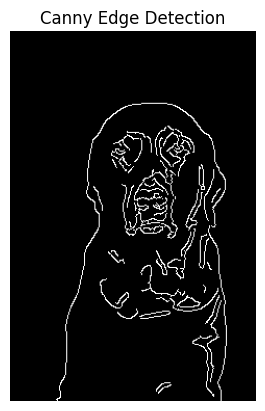

In [13]:

# Step 1: Read the image and convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 2: Apply Gaussian Blurring
blurred = cv2.GaussianBlur(gray, (5, 5), 1.4)

# Step 3: Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 100)

# Display the results
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


### Exercise 5: K-Means Clustering for Image Segmentation


**Objective:** Segment an image using K-Means clustering.

**Steps:**
1. Load and reshape the image.
2. Apply K-Means clustering with a specified number of clusters.
3. Replace pixels with cluster centroids to create the segmented image.

**Code Implementation:**

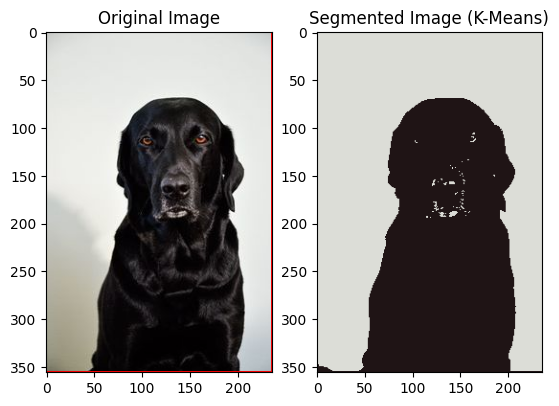

In [20]:

from sklearn.cluster import KMeans

# Step 1: Read the image and reshape it
pixels = image.reshape(-1, 3)

# Step 2: Apply K-Means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Step 3: Replace each pixel with its cluster centroid
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape).astype(np.uint8)

# Display the results
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Segmented Image (K-Means)")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()


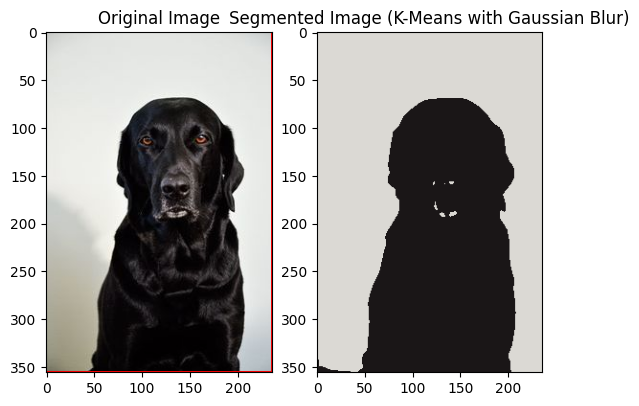

In [21]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Apply Gaussian Blur to the image
# Adjust the kernel size and sigma value for different levels of blurring
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Read the blurred image and reshape it
pixels = blurred_image.reshape(-1, 3)

# Step 3: Apply K-Means clustering
k = 2  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)

# Step 4: Replace each pixel with its cluster centroid
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image.shape).astype(np.uint8)

# Display the results
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Segmented Image (K-Means with Gaussian Blur)")
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()


### Exercise 6: Watershed Algorithm for Image Segmentation


**Objective:** Use the Watershed algorithm to segment an image.

**Steps:**
1. Convert the image to grayscale and apply Gaussian blur.
2. Compute the gradient to identify edges.
3. Apply thresholding and morphological operations to create markers.
4. Use Watershed to segment the image.

**Code Implementation:**

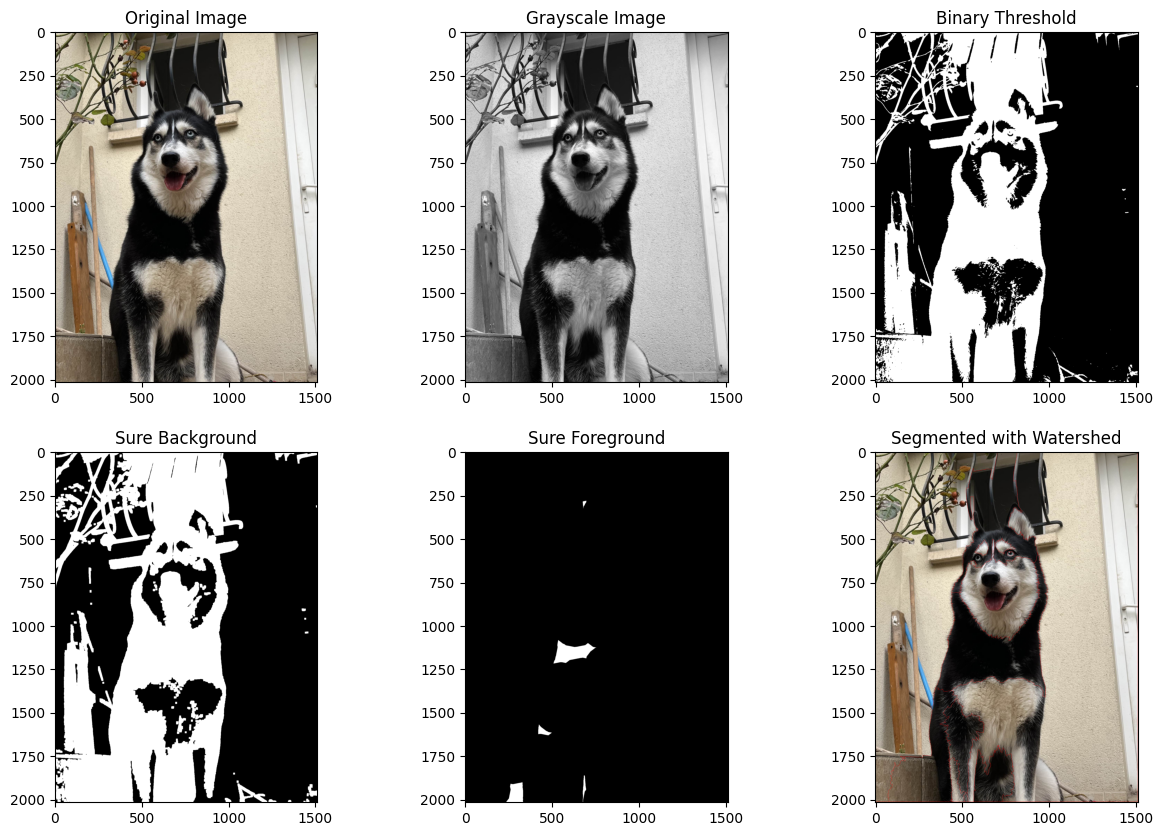

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def watershed_segmentation(image_path):
    # Load the image
    image = cv2.imread(image_path)
    original = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 1: Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Step 2: Thresholding to separate foreground and background
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Step 3: Remove noise through morphological opening
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

    # Step 4: Define the sure background area by dilating the image
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Step 5: Identify the sure foreground area using distance transform
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)

    # # Step 6: Subtract sure foreground from sure background to get unknown region
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Step 7: Label the sure foreground regions with markers
    _, markers = cv2.connectedComponents(sure_fg)

    # Step 8: Add one to all labels so that the unknown region is marked as 0
    markers = markers + 1
    markers[unknown == 255] = 0

    # Step 9: Apply the Watershed algorithm
    cv2.watershed(image, markers)
    image[markers == -1] = [0, 0, 255]  # Mark boundaries in red

    # Display Results
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(2, 3, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale Image')
    plt.subplot(2, 3, 3), plt.imshow(binary, cmap='gray'), plt.title('Binary Threshold')
    plt.subplot(2, 3, 4), plt.imshow(sure_bg, cmap='gray'), plt.title('Sure Background')
    plt.subplot(2, 3, 5), plt.imshow(sure_fg, cmap='gray'), plt.title('Sure Foreground')
    plt.subplot(2, 3, 6), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Segmented with Watershed')
    plt.show()

# Example usage
image_path = '/content/drive/MyDrive/Computer vision/husky.png' # Replace with your image path
watershed_segmentation(image_path)
